In [16]:
import pymrio
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import FuncFormatter
import os
import imageio


In [38]:
def load(year):
    df = pd.read_csv(f'C:\Master 1\Stage\Exio3\df_CattleFarm_Imp_{year}.csv')

    return df

In [39]:
df_1995 = load(1995)
df_2002 = load(2002)
df_2009 = load(2009)
df_2016 = load(2016)
df_2022 = load(2022)

In [10]:
# Chargement des bases de données de 1995 à 2022
# Creation d'un dictionnaire 'dfs' qui associe chaque année à une DataFrame en utilisant la fonction load
dfs = {
    1995: df_1995,
    2002: df_2002,
    2009: df_2009,
    2016: df_2016,
    2022: df_2022}

# Création d'astériques
regions_ast = ["Afrique$^{1}$", "Chine", "Etats-Unis", "Asie Pacifique$^{2}$", 
    "Amérique Latine\net Caraïbes$^{3}$", "Brésil", "Russie", "Mexique", 
    "Australie", "Moyen-Orient$^{4}$", "Union\neuropéenne$^{5}$", 
    "Europe$^{6}$", "Canada", "Inde", "Indonésie", "Japon"]

# Création d'un répertoire 'GHG_heatmap' pour enregistrer les cartes thermiques
os.makedirs('LandUse_CattleFarm_Imp_heatmap', exist_ok=True)

# Création d'une boucle pour chaque année dans le dictionnaire 'dfs'
for year, df in dfs.items():
    # Modifier le noms des régions des colonnes et des lignes avec la liste 'region_ast'
    df.columns = regions_ast
    df.index = regions_ast
    # Donner un nom aux colonnes et aux lignes
    df.columns.name = "Région réceptrice d'émissions de GES"
    df.index.name = "Région source d'émission de GES"
    
    # Modifier la taille de la carte thermique
    plt.figure(figsize=(30, 15))
    
    # Création d'une carte thermique des DataFrames
    sns.heatmap(df, norm=LogNorm(vmin=1, vmax=99),
                annot=True, cmap='YlOrRd', linewidths=0.1,
                cbar_kws={'label': 'Emissions de GES (kg CO2 eq)'})
    
    # Titre de la carte thermique
    plt.title(f"Emissions de gaz à effet de serre associés à la consommation finale par région en {year}", fontsize=14, fontweight='bold', y=-0.09)

    # Permet d'ajuster la position des éléments de la carte thermique
    plt.subplots_adjust(bottom=0.3)
    
    # Création des notes en bas de pages associées aux astériques
    plt.figtext(0.05, 0.07, "$^{1}$ Afrique hors Egypte.", fontsize=10)
    plt.figtext(0.05, 0.06, "$^{2}$ Asie Pacifique hors Chine, Inde, Japon, Australie et Indonésie.", fontsize=10)
    plt.figtext(0.05, 0.05, '$^{3}$ Amérique Latine et Caraïbes hors Brésil et Mexique', fontsize=10)
    plt.figtext(0.05, 0.04, '$^{4}$ Moyen-Orient hors Turquie.', fontsize=10)
    plt.figtext(0.05, 0.03, "$^{5}$ Représente les 27 pays actuels de l'Union européenne, indépendamment de l'année représentée.", fontsize=10)
    plt.figtext(0.05, 0.02, "$^{6}$ Europe hors les pays membres de l'UE et Russie.", fontsize=10)

    # Ajuster l'espacement des éléments de la carte thermique
    plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    
    # Sauvegarder la carte de thermique
    frame_filename = f'LandUse_CattleFarm_Imp_heatmap/LandUse_CattleFarm_Imp_{year}.png'
    plt.savefig(frame_filename, bbox_inches='tight')

    # Pour fermer la carte thermique
    plt.close()


In [9]:
#Initialisation : liste vide pour stocker les images créées
images = []

#Création d'une boucle pour chaque année du dictionnaire 'dfs'
for year in dfs.keys():
    frame_filename = f'LandUse_CattleFarm_Imp_heatmap/LandUse_CattleFarm_Imp_{year}.png'
    #Charge l'image et l'ajoute à la liste 'images'
    images.append(imageio.imread(frame_filename))

#Nom du fichier GIF
gif_filename = 'LandUse_CattleFarm_Imp_heatmap.gif'

#Création du GIF
imageio.mimsave(gif_filename, images, duration=1000, loop=0)

C:\Users\Marie\AppData\Local\Temp\ipykernel_20848\2201662253.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(frame_filename))


In [55]:
order = ["Afrique", "CN", "US", "Asie Pacifique", "WL", "BR", "RU", "MX", "AU","Moyen-Orient",  "UE",  "Europe", "CA", "IN", "ID", "JP"]

# Initialiser un DataFrame vide pour stocker les valeurs diagonales
dfs_diag = pd.DataFrame(index=order)

# Parcourir chaque année et DataFrame dans le dictionnaire dfs
for year, df in dfs.items():
    # Extraire les valeurs diagonales
    diagonal_val = df.values.diagonal()
    
    # Créer une DataFrame avec les valeurs de la diagonale
    df_diag = pd.DataFrame(diagonal_val, index=order, columns=[f'{year}'])
    
    # Ajouter cette DataFrame à df_diag
    dfs_diag = pd.concat([dfs_diag, df_diag], axis=1)

In [56]:
dfs_diag

,1995,2002,2009,2016,2022
Afrique,99.180754,98.176956,97.496795,98.046903,98.142744
CN,95.281332,88.528578,84.562167,72.312083,64.126412
US,82.021614,68.833439,77.943419,72.210188,72.891111
Asie Pacifique,79.292446,79.179107,81.566640,71.221524,66.759840
WL,95.348809,94.148276,91.966531,91.796390,91.032159
BR,87.737662,93.849711,95.014308,91.072410,89.185857
RU,77.308774,80.317206,62.470650,67.468835,66.160141
MX,92.091134,71.216018,82.090165,80.398488,80.456069
AU,96.237580,95.645808,95.186113,89.935521,85.206890
Moyen-Orient,72.001307,45.861723,29.579299,25.955698,27.720003


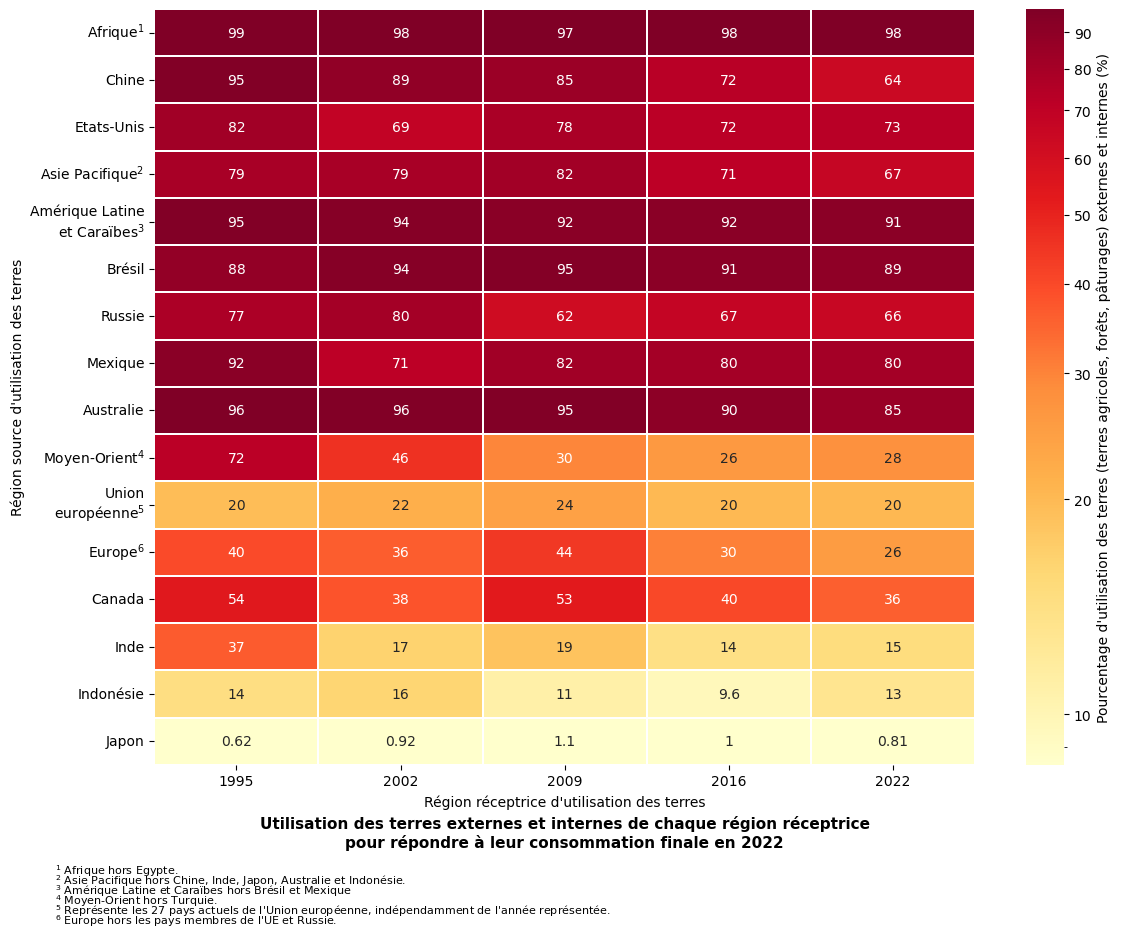

In [58]:
#Création des astériques
regions_ast = ["Afrique$^{1}$", "Chine", "Etats-Unis", "Asie Pacifique$^{2}$", 
    "Amérique Latine\net Caraïbes$^{3}$", "Brésil", "Russie", "Mexique", 
    "Australie", "Moyen-Orient$^{4}$", "Union\neuropéenne$^{5}$", 
    "Europe$^{6}$", "Canada", "Inde", "Indonésie", "Japon"]
    
#Modifier le noms des régions des colonnes et des lignes avec la liste 'region_ast'
dfs_diag.index = regions_ast

#Donner un noms aux colonnes et aux lignes
dfs_diag.columns.name = "Région réceptrice d'utilisation des terres"
dfs_diag.index.name = "Région source d'utilisation des terres"
    
#Modifier la taille de la carte thermique
plt.figure(figsize=(12, 10))
    
#Création d'une carte thermique des DataFrames
sns.heatmap(dfs_diag, norm=LogNorm(vmin=8.5, vmax=97),
            annot=True, cmap='YlOrRd', linewidths=0.1,
            cbar_kws={"label": "Pourcentage d'utilisation des terres (terres agricoles, forêts, pâturages) externes et internes (%)",
            "format": FuncFormatter(lambda x, _: f'{x:.0f}'), "ticks": range(10, 100, 10)})

#Titre de la carte thermique
plt.title(f"Utilisation des terres externes et internes de chaque région réceptrice\npour répondre à leur consommation finale en {year}", fontsize=11, fontweight='bold', y=-0.12)

#Permet d'ajuster la positions des éléments de la carte thermique
plt.subplots_adjust(bottom=0.3)
    
#Création des notes en bas de pages associées aux astériques
plt.figtext(0.05, 0.07, "$^{1}$ Afrique hors Egypte.", fontsize=8)
plt.figtext(0.05, 0.06, "$^{2}$ Asie Pacifique hors Chine, Inde, Japon, Australie et Indonésie.", fontsize=8)
plt.figtext(0.05, 0.05, '$^{3}$ Amérique Latine et Caraïbes hors Brésil et Mexique', fontsize=8)
plt.figtext(0.05, 0.04, '$^{4}$ Moyen-Orient hors Turquie.', fontsize=8)
plt.figtext(0.05, 0.03, "$^{5}$ Représente les 27 pays actuels de l'Union européenne, indépendamment de l'année représentée.", fontsize=8)
plt.figtext(0.05, 0.02, "$^{6}$ Europe hors les pays membres de l'UE et Russie.", fontsize=8)


#Ajuster l'espacements des éléments de la carte thermique
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    
#Sauvegarder la carte de thermique
frame_filename = f'C:\Master 1\Stage\Exio3\IOT_2011_ixi\LandUse_Imp_Diag\LandUse_Imp_CattleFarm_{year}.png'
plt.savefig(frame_filename, bbox_inches='tight')

#Afficher la heatmap
plt.show()


In [49]:
dfs_diag = dfs_diag.loc[['CN', 'MX', 'Moyen-Orient', 'Europe', 'CA']]


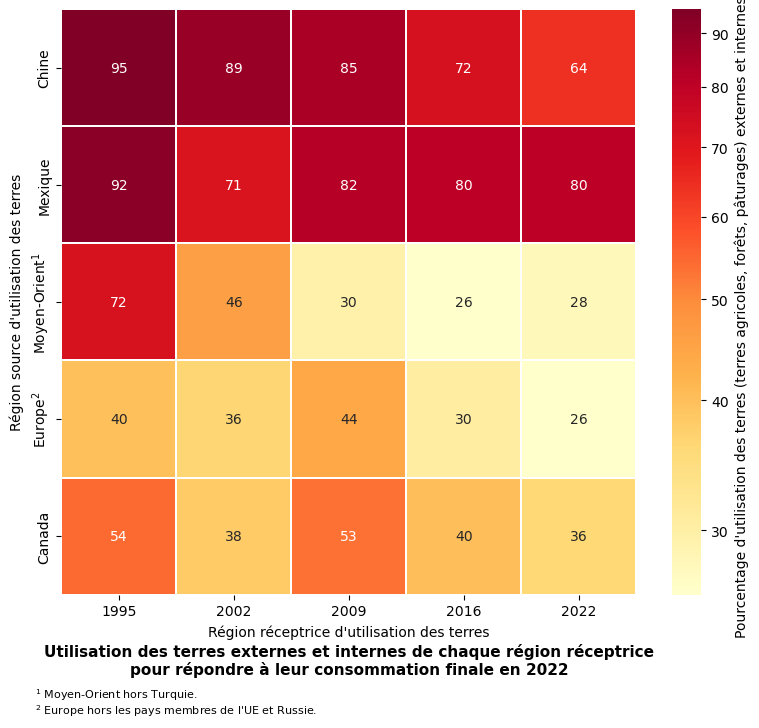

In [53]:
#Création des astériques
regions_ast = ["Chine", "Mexique", "Moyen-Orient$^{1}$", "Europe$^{2}$", "Canada"]
    
    
#Modifier le noms des régions des colonnes et des lignes avec la liste 'region_ast'
dfs_diag.index = regions_ast

#Donner un noms aux colonnes et aux lignes
dfs_diag.columns.name = "Région réceptrice d'utilisation des terres"
dfs_diag.index.name = "Région source d'utilisation des terres"
    
#Modifier la taille de la carte thermique
plt.figure(figsize=(8, 8))
    
#Création d'une carte thermique des DataFrames
sns.heatmap(dfs_diag, norm=LogNorm(vmin=26, vmax=95),
            annot=True, cmap='YlOrRd', linewidths=0.1,
            cbar_kws={"label": "Pourcentage d'utilisation des terres (terres agricoles, forêts, pâturages) externes et internes (%)",
            "format": FuncFormatter(lambda x, _: f'{x:.0f}'), "ticks": range(10, 100, 10)})

#Titre de la carte thermique
plt.title(f"Utilisation des terres externes et internes de chaque région réceptrice\npour répondre à leur consommation finale en {year}", fontsize=11, fontweight='bold', y=-0.15)

#Permet d'ajuster la positions des éléments de la carte thermique
plt.subplots_adjust(bottom=0.3)
    
#Création des notes en bas de pages associées aux astériques
plt.figtext(0.05, 0.07, "$^{1}$ Moyen-Orient hors Turquie.", fontsize=8)
plt.figtext(0.05, 0.05, "$^{2}$ Europe hors les pays membres de l'UE et Russie.", fontsize=8)

#Ajuster l'espacements des éléments de la carte thermique
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    
#Sauvegarder la carte de thermique
frame_filename = f'C:\Master 1\Stage\Exio3\IOT_2011_ixi\LandUse_Imp_Diag\LandUse_Imp_CattleFarm_{year}.png'
plt.savefig(frame_filename, bbox_inches='tight')

#Afficher la heatmap
plt.show()
